# **Infosys Springboard ML Project**

# **[Cyberbullying Tweets Dataset](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)**

# **Rohan Todkar**


# Project Overview: Cyberbullying Prediction using Multi-Label Classification

This project aims to develop a robust system to detect and classify cyberbullying in online text data. The notebook follows a structured workflow:

- **Data Analysis and Visualization**:  
  The datasets are explored to analyze label distributions and generate visualizations for better understanding. These insights provide a foundation for further processing.

- **Text Preprocessing**:  
  Various Natural Language Processing (NLP) techniques, such as tokenization, lemmatization, and feature extraction (using TF-IDF and Word2Vec), are applied to clean and prepare the text data for modeling.

- **Model Building**:  
  Machine learning classifiers like Logistic Regression, Random Forest, and ensemble models are trained to predict cyberbullying types effectively. Additionally, transformer-based models such as RoBERTa are utilized to enhance the classification performance.

- **Evaluation**:  
  The models are evaluated using metrics such as accuracy, precision, recall, and F1-score to assess their ability to detect and classify various forms of cyberbullying.

- **Visualization of Results**:  
  Visual aids are employed to compare and present the performance of different models and techniques, highlighting their strengths and areas for improvement.

This structured approach combines traditional NLP methods with advanced machine learning techniques to tackle cyberbullying classification efficiently.


## **Installing Libraries**

In [7]:
# Installing necessary libraries for the project
!pip install plotly.express  # Installs Plotly for interactive visualizations
!pip install nltk  # Installs NLTK (Natural Language Toolkit) for text processing
!pip install wordcloud  # Installs WordCloud for generating word cloud visualizations
!pip install scikit-learn  # Installs scikit-learn for machine learning and data preprocessing
!pip install imbalanced-learn  # Installs imbalanced-learn for handling imbalanced datasets
!pip install -U scikit-learn  # Upgrades scikit-learn to the latest version
!pip install transformers  # Installs Hugging Face's Transformers library for NLP tasks
!pip install torch  # Installs PyTorch, a deep learning framework
!pip install ipywidgets  # Installs ipywidgets for creating interactive widgets in Jupyter Notebooks


- These installations ensure that you have all the necessary libraries for text processing, data visualization, machine learning, and deep learning tasks.
- Libraries like `scikit-learn`, `imbalanced-learn`, and `transformers` will be particularly useful for building and improving your machine learning models.


## **Importing Libraries**

In [8]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Core Libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import string
from string import punctuation
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

# Utility
import pickle

1. `warnings`: This module is used to suppress warning messages that might clutter the output during execution.
2. `numpy` and `pandas`: These are key libraries for data manipulation, especially for handling and processing large datasets.
3. `re`: Regular expressions help with pattern matching and string manipulation, commonly used in text cleaning.
4. `matplotlib`, `seaborn`, and `plotly.express`: These libraries are used for visualizing data. `matplotlib` and `seaborn` are great for static visualizations, while `plotly.express` allows for interactive plots.
5. `string` and `punctuation`: These provide utilities for working with string data, including punctuation characters.
6. `Counter`: This is used for counting occurrences of elements, such as word frequencies.
7. `PIL.Image`: The Python Imaging Library allows for image manipulation (e.g., for creating word clouds).
8. `wordcloud`: A library for generating word clouds, which visualize the most frequent terms in a dataset.
9. `nltk`: This toolkit offers essential functions for natural language processing (e.g., tokenization, stopwords removal, and lemmatization).
10. `scikit-learn`: A powerful library for building machine learning models, providing tools for data preprocessing, model building, and evaluation.
11. `pickle`: This module allows for saving Python objects (like trained models) to disk so that they can be loaded and reused without retraining.


## **Data Import**

In [6]:
# Mounting Google Drive to access files stored in the drive from Google Colab.
# This will prompt for authentication and grant access to the files.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv('cyberbullying_tweets.csv')  # Reads the CSV file containing the tweets and stores it as a DataFrame

# Displaying the first few rows of the DataFrame to inspect the dataset
print(df)  # Prints the entire DataFrame, showing the structure and the data within the CSV file


                                              tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Displaying the first 5 rows of the DataFrame to get a quick look at the data structure
df.head(5)  # Shows the first 5 rows of the DataFrame to inspect a sample of the dataset


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [12]:
df.shape

(47692, 2)

df.shape returns the tuple (47692, 2), which means:
The dataset contains 47,692 rows, each representing a tweet or an entry in your dataset.
The dataset has 2 columns, which could likely represent features such as the tweet text and the label (e.g., cyberbullying type).

In [13]:
# Displaying the column names of the DataFrame to understand the features in the dataset
df.columns  # Returns the column names of the DataFrame


Index(['tweet_text', 'cyberbullying_type'], dtype='object')

tweet_text: The text content of the tweet.


cyberbullying_type: The label that categorizes the type of cyberbullying

In [14]:
# Generating a summary of statistics for the DataFrame, including non-numeric columns
df.describe(include="all")  # Provides a summary of count, unique values, most frequent, etc.


,tweet_text,cyberbullying_type
count,47692,47692
unique,46006,6
top,#NAME?,religion
freq,12,7998


count: 47,692 entries for both columns.

unique: 46,006 unique tweet texts, 6 unique cyberbullying categories.

top: Most frequent value is #NAME? for tweets and religion for cyberbullying type.

freq: #NAME? appears 12 times, and religion appears 79 times.


In [15]:
# Displaying information about the DataFrame, including column types and non-null counts
df.info()  # Provides a summary of the DataFrame including data types and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


RangeIndex: 47,692 entries, 0 to 47,691

Data columns (total 2 columns):
- Column 1: `tweet_text`, with 47,692 non-null entries and data type `object` (string).
- Column 2: `cyberbullying_type`, with 47,692 non-null entries and data type `object` (string).

Both columns contain no missing values, and they are both of `object` type, indicating they are text data.


## **Data Pre-processing**

In [16]:
# Checking for any missing (null) values in the dataset
df.isnull().sum()  # Counts the number of null (missing) values in each column


,0
tweet_text,0
cyberbullying_type,0


- `tweet_text` column has **0** missing values.
- `cyberbullying_type` column has **0** missing values.

This confirms that the dataset contains no missing or null values in any of the columns.


In [17]:
# Checking for duplicated entries in the 'tweet_text' column
df['tweet_text'].duplicated().sum()  # Counts the number of duplicated rows in the 'tweet_text' column


1686

- There are **1,686** duplicated entries in the `tweet_text` column.

This indicates that there are 1,686 rows in the dataset where the tweet text is repeated.


In [18]:
# Dropping duplicated rows based on the 'tweet_text' column and resetting the index
df.drop_duplicates('tweet_text', inplace=True, ignore_index=True)  # Removes duplicate tweet texts
df['tweet_text'].duplicated().sum()  # Verifies if any duplicates remain after dropping


0

- After dropping duplicates, there are **0** duplicated entries remaining in the `tweet_text` column.

This confirms that all duplicated tweet texts have been successfully removed from the dataset.


In [19]:
# Counting the occurrences of each category in the 'cyberbullying_type' column
df.cyberbullying_type.value_counts()  # Displays the frequency of each cyberbullying type


,count
cyberbullying_type,
religion,7994
age,7989
ethnicity,7951
not_cyberbullying,7937
gender,7895
other_cyberbullying,6240


- `religion` appears **7,994** times, making it the most frequent cyberbullying type.
- `age` appears **7,989** times.
- `ethnicity` appears **7,951** times.
- `not_cyberbullying` appears **7,937** times.
- `gender` appears **7,895** times.
- `other_cyberbullying` appears **6,240** times.

This provides the distribution of different cyberbullying types, showing the most and least common categories.


<Axes: xlabel='cyberbullying_type'>

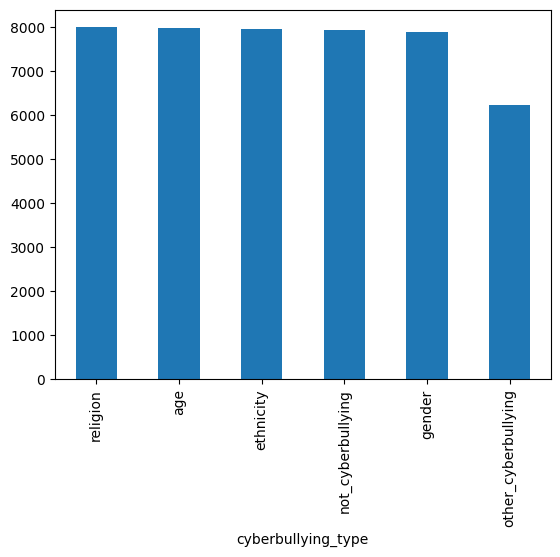

In [20]:
# Plotting a bar chart to visualize the distribution of cyberbullying types
df.cyberbullying_type.value_counts().plot(kind="bar")  # Displays a bar chart of cyberbullying type frequencies


- The bar chart visually represents the distribution of cyberbullying types.
- Categories like `religion`, `age`, and `ethnicity` are the most frequent, while `other_cyberbullying` has the least frequency.

This helps in understanding the overall distribution of cyberbullying types in the dataset.
Since the other_cyberbullying class is too generic, contains many categories in itself and brings down the accuracies of the upcoming prediction models, I have decided to remove it and work with the remaining classes.

In [21]:
# Checking the unique values in the 'cyberbullying_type' column
df.cyberbullying_type.unique()  # Displays the unique categories in the 'cyberbullying_type' column


array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

- The unique values (categories) in the `cyberbullying_type` column are:
  1. `not_cyberbullying`
  2. `gender`
  3. `religion`
  4. `other_cyberbullying`
  5. `age`
  6. `ethnicity`

This confirms that the `cyberbullying_type` column contains six distinct categories, which represent different types of cyberbullying or instances where there is no cyberbullying.


In [22]:
# Filtering out the 'other_cyberbullying' category from the dataset
df = df[df["cyberbullying_type"] != "other_cyberbullying"]  # Removes rows where cyberbullying_type is 'other_cyberbullying'
df['cyberbullying_type'].unique()  # Displays the unique categories in the 'cyberbullying_type' column after filtering


array(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity'],
      dtype=object)

- After filtering, the `cyberbullying_type` column now contains **5 unique categories**:
  1. `not_cyberbullying`
  2. `gender`
  3. `religion`
  4. `age`
  5. `ethnicity`

The category `other_cyberbullying` has been removed from the dataset.


In [23]:
# Encoding the 'cyberbullying_type' into numerical values
df['sentiment_encoded'] = df['cyberbullying_type'].replace(
    {
        'not_cyberbullying': 0,
        'gender': 1,
        'religion': 2,
        'age': 3,
        'ethnicity': 4
    })


- The `replace()` method is used to map the categories in the `cyberbullying_type` column to corresponding numerical values.
- The newly created `sentiment_encoded` column holds the numeric representations of the cyberbullying categories.


## **NLP Processing**

In [24]:
# Downloading the stopwords dataset from NLTK (Natural Language Toolkit)
nltk.download('stopwords')  # Downloads the list of stopwords to be used for text preprocessing


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- The `stopwords` corpus is necessary for removing unnecessary words from text data, which helps improve the quality of text analysis and model performance.
- This step ensures that the NLTK stopwords dataset is available for use in your project for cleaning and preprocessing text.


In [25]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

- The `punkt` tokenizer is a fundamental tool for splitting text into words or sentences, which is essential for many text processing tasks.
- The `punkt_tab` tokenizer, which is more specific, might be useful when dealing with tab-separated text. It is typically not required for standard text processing unless your dataset uses tabs as delimiters.


In [26]:
# Downloading the WordNet corpus from NLTK (Natural Language Toolkit)
nltk.download('wordnet')  # Downloads the WordNet corpus, which is used for lemmatization


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

- The `wordnet` corpus is a lexical database of the English language, which groups words into sets of synonyms (synsets) and provides information about their meanings.
- It is primarily used in lemmatization, where words are reduced to their base or root form (e.g., "running" becomes "run").


In [27]:
# Creating a list of stopwords in English and adding custom stopwords specific to Twitter lingo
stopwords_list = stopwords.words('english')  # Loads the default English stopwords from NLTK
additional_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's']  # Custom stopwords specific to Twitter
stopwords_list.extend(additional_stopwords)  # Adds custom stopwords to the list

# Initializing the lemmatizer from WordNet for reducing words to their root form
lemmatizer = WordNetLemmatizer()  # Prepares the WordNet lemmatizer for text processing


1. **stopwords_list**:
   - The stopwords list is initialized with common English stopwords and extended with custom Twitter-specific stopwords, which will help clean and preprocess text data for tasks like sentiment analysis or classification.

2. **lemmatizer**:
   - The `WordNetLemmatizer` is initialized to ensure that words are reduced to their root forms, making the text analysis process more efficient by treating variations of a word as the same (e.g., "cats" and "cat" will be treated as the same word).


## **Preprocessing of text**

In [28]:
def remove_usernames(tweet):
    words = tweet.strip().split()  # Splits the tweet into a list of words
    words = [word for word in words if word[0]!='@']  # Removes words that start with '@' (usernames)
    return ' '.join(words)  # Joins the remaining words back into a tweet

def remove_hashtags(tweet):
    words = tweet.strip().split()  # Splits the tweet into a list of words
    words = [word for word in words if word[0]!='#']  # Removes words that start with '#' (hashtags)
    return ' '.join(words)  # Joins the remaining words back into a tweet

def remove_links(tweet):
    words = tweet.strip().split()  # Splits the tweet into a list of words
    words = [word for word in words if word[:4]!='http']  # Removes words that start with 'http' (URLs)
    return ' '.join(words)  # Joins the remaining words back into a tweet

def remove_punctuation(tweet):
    for mark in punctuation:  # Iterates over all punctuation marks
        tweet = tweet.replace(mark, '')  # Removes each punctuation mark from the tweet
    return tweet  # Returns the cleaned tweet without punctuation

def convert_lowercase(tweet):
    return tweet.lower()  # Converts the tweet to lowercase

def tokenization(tweet):
    return word_tokenize(tweet)  # Tokenizes the tweet into words

def remove_stopwords(tok_tweet):
    res = []  # Initializes an empty list to store the result
    for word in tok_tweet:
        if word not in stopwords_list:  # Checks if the word is not in the stopwords list
            res.append(word)  # Adds the word to the result list if it's not a stopword
    return res  # Returns the list of words without stopwords

def lemmatize_words(tok_tweet):
    res = []  # Initializes an empty list to store the result
    for word in tok_tweet:
        res.append(lemmatizer.lemmatize(word))  # Lemmatizes each word in the tokenized tweet
    return res  # Returns the list of lemmatized words


In [29]:
# Defining a custom tweet cleaning function
# tweet = decontract(tweet)  # Optional function to expand contractions
# tweet = remove_mult_spaces(tweet)  # Optional function to remove multiple spaces
def pre_processing_custom(tweet):
    # Step 1: Remove usernames (words starting with '@')
    tweet = remove_usernames(tweet)

    # Step 2: Remove hashtags (words starting with '#')
    tweet = remove_hashtags(tweet)

    # Step 3: Remove URLs (words starting with 'http')
    tweet = remove_links(tweet)

    # Step 4: Remove punctuation marks from the tweet
    tweet = remove_punctuation(tweet)

    # Step 5: Convert the entire tweet to lowercase
    tweet = convert_lowercase(tweet)

    # Step 6: Tokenize the tweet into individual words
    tok_tweet = tokenization(tweet)

    # Step 7: Remove stopwords from the tokenized tweet
    tok_tweet = remove_stopwords(tok_tweet)

    # Step 8: Lemmatize the words (reduce to root form)
    tok_tweet = lemmatize_words(tok_tweet)

    # Step 9: Join the tokenized and processed words back into a cleaned tweet
    clean_tweet = ' '.join(tok_tweet)

    return clean_tweet  # Return the cleaned tweet


In [30]:
# Applying the custom pre-processing function to clean the tweets
df['cleaned_text'] = df['tweet_text'].map(pre_processing_custom)

# Displaying the first 5 rows to check the results
df.head(5)


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...


The clean_tweets column holds the processed tweets.

It's nice and does the job, but we can do much better cleaning by using pre-defined functions and RegEx.
Therefore, I'm using the tweet-preprocessor library, as shown below

In [31]:
!pip install tweet-preprocessor  # Installing the tweet-preprocessor library
import preprocessor as p  # Importing the library as 'p'


In [32]:
def clean_tweets(tweet):
    tweet = p.clean(tweet)  # Using the preprocessor library to clean the tweet
    return tweet  # Returning the cleaned tweet


In [33]:
def pre_processing(tweet):
    tweet = clean_tweets(tweet)  # Step 1: Clean the tweet using the preprocessor library
    tweet = remove_punctuation(tweet)  # Step 2: Remove punctuation from the tweet
    tweet = convert_lowercase(tweet)  # Step 3: Convert the tweet to lowercase
    tok_tweet = tokenization(tweet)  # Step 4: Tokenize the tweet into words
    tok_tweet = remove_stopwords(tok_tweet)  # Step 5: Remove stopwords from the tokenized tweet
    tok_tweet = lemmatize_words(tok_tweet)  # Step 6: Lemmatize the words to their base forms
    clean_tweet = ' '.join(tok_tweet)  # Step 7: Join the lemmatized words back into a cleaned tweet

    return clean_tweet  # Return the final processed tweet


In [34]:
# Apply the pre_processing function to each tweet in the 'tweet_text' column
# This will clean and process each tweet, such as removing usernames, hashtags, links,
# converting to lowercase, tokenizing, removing stopwords, and lemmatizing.
df['cleaned_text'] = df['tweet_text'].map(pre_processing)

# Display the first 5 rows of the DataFrame to inspect the cleaned text
df.head(5)


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...


In [35]:
# Check for the number of duplicated entries in the 'cleaned_text' column
# This returns the count of duplicate rows in the 'cleaned_text' column
df['cleaned_text'].duplicated().sum()


1216

In [36]:
# Removing duplicate rows based on the 'cleaned_text' column
df.drop_duplicates('cleaned_text', inplace=True, ignore_index=True)

# Checking the number of duplicate entries again after removing duplicates
df['cleaned_text'].duplicated().sum()


0

In [37]:
df.shape# Checking the shape of the DataFrame after removing duplicates

(38550, 4)

38550 tweets are remaining.

Now that we have processed the tweets, it's time to move forward and calculate the total and average word lengths of each tweet.

In [38]:
# Calculating the total word count for each tweet
df['word_count'] = df['tweet_text'].map(lambda x: len(x.split()))

# Displaying a sample of 5 rows to view the word count column
df.sample(5)


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count
30232,So do we think he was bullied or savagely reje...,age,3,think bullied savagely rejected girl high school,17
19070,I hope u will also talk about Kashmiri Hindu P...,religion,2,hope also talk kashmiri hindu pandits genocide...,16
1241,@TawheedNetwork_ @mutaSawwif And Sharia says a...,not_cyberbullying,0,sharia say apostate must killed,9
36734,idk if uve ever been slapped with a ruler by u...,ethnicity,4,idk uve ever slapped ruler teacher id let hiso...,36
1718,RT @THEJordonBrown: Here are the Charlie Hedbo...,not_cyberbullying,0,charlie hedbo cartoon people died today view s...,19


In [39]:
# Function to calculate the average word length of a tweet
def avg_word_length(tweet):
    # Splitting the tweet into words
    words = tweet.split()

    # Counting the total number of words
    word_count = len(words)

    # Initializing a variable to accumulate the total length of all words
    word_length = 0

    # Summing up the length of each word
    for word in words:
        word_length += len(word)

    # Calculating the average word length and rounding it to 2 decimal places
    avg_length = round(word_length / word_count, 2)

    return avg_length

# Applying the avg_word_length function to the 'tweet_text' column
df['avg_word_length'] = df['tweet_text'].map(avg_word_length)

# Displaying a sample of 5 rows to view the average word length column
df.sample(5)


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length
12247,Did you see the horrendously sexist animated v...,gender,1,see horrendously sexist animated version killi...,48,4.94
1950,@RJennromao @DavidJo52951945 @Novorossiyan @GB...,not_cyberbullying,0,ukr army got non lethal aid scumbag putin sent...,17,7.18
2911,"Next year, on My Kitchen Rules..... We may eve...",not_cyberbullying,0,next year kitchen rule may eventually get past...,18,5.22
36069,no im allowed 4 wives woman.... ur my first on...,ethnicity,4,allowed wife woman first one wifey though,12,4.08
25632,Me still thinking about the girls who bullied ...,age,3,still thinking girl bullied middlehigh school ...,23,4.65


In [40]:
# Filtering the dataframe to include only tweets with more than 3 words and less than 100 words
df = df[df['word_count'] > 3]  # Keeping tweets with more than 3 words
df = df[df['word_count'] < 100]  # Keeping tweets with less than 100 words

# Resetting the index after filtering the rows
df.reset_index(drop=True, inplace=True)

# Displaying the shape of the dataframe after filtering
df.shape


(38193, 6)

In [41]:
# Tokenizing the cleaned tweets into individual words (tokens)
df['tweet_list'] = df['cleaned_text'].apply(word_tokenize)

# Displaying the first few rows to check the result
df.head()


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious,9,5.89,"[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white,14,7.29,[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake,9,5.78,"[classy, whore, red, velvet, cupcake]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...,18,4.72,"[meh, thanks, head, concerned, another, angry,..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...,18,4.72,"[isi, account, pretending, kurdish, account, l..."


In [42]:
# Calculating the length of each tokenized tweet (i.e., number of tokens/words in each tweet)
text_len = []
for text in df.tweet_list:
    tweet_len = len(text)  # Get the number of tokens in the tweet
    text_len.append(tweet_len)

# Adding the calculated tweet lengths as a new column
df['text_len'] = text_len

# Displaying the first few rows to check the result
df.head()


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious,9,5.89,"[word, food, crapilicious]",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white,14,7.29,[white],1
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake,9,5.78,"[classy, whore, red, velvet, cupcake]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...,18,4.72,"[meh, thanks, head, concerned, another, angry,...",8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...,18,4.72,"[isi, account, pretending, kurdish, account, l...",8


## **Data Visualization**

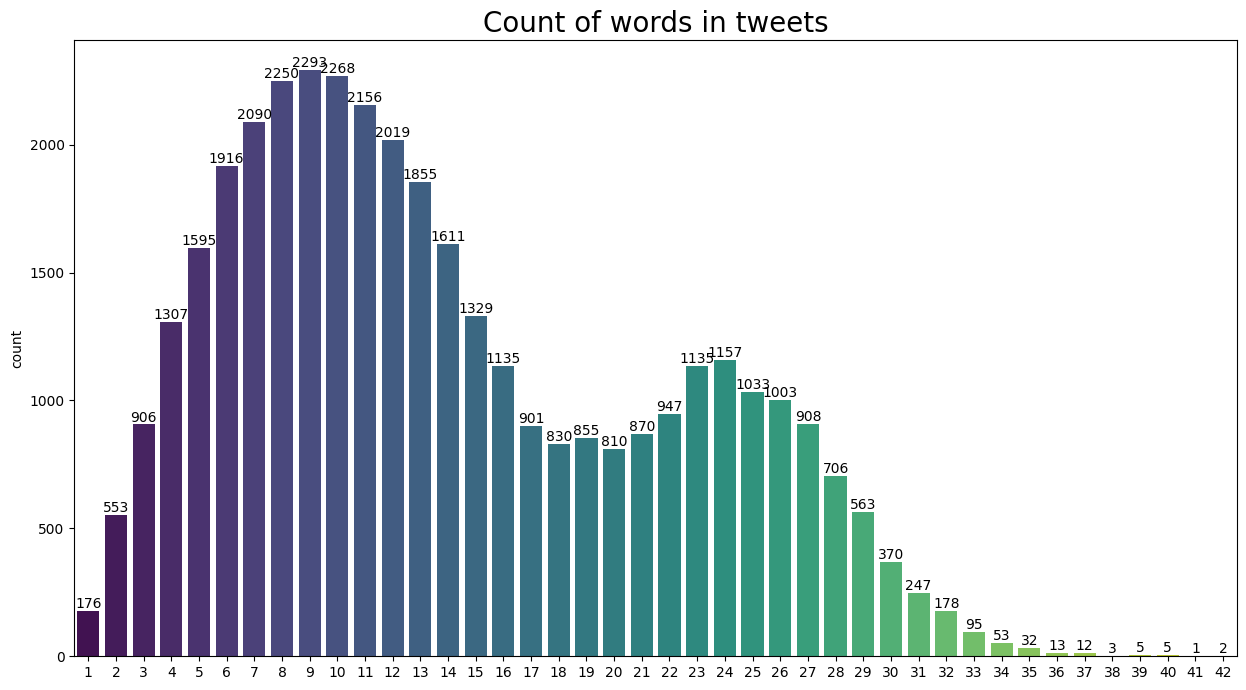

In [43]:
# Plotting the distribution of tweet lengths (number of words)
plt.figure(figsize=(15, 8))  # Set the figure size for better readability

# Create a countplot to visualize the distribution of tweet lengths
ax = sns.countplot(x='text_len', data=df, palette='viridis')

# Adding title to the plot
plt.title('Count of words in tweets', fontsize=20)

# Adding labels to the bars for better understanding
for container in ax.containers:
    ax.bar_label(container)

# Set labels for the axes
plt.ylabel('count')  # Label for the y-axis
plt.xlabel('')  # No label for x-axis as it represents tweet length (number of words)

# Display the plot
plt.show()


### **Word Clouds and Counter**

In [44]:
# Function to plot a word cloud for a specific cyberbullying type
def plot_wordcloud(cyberbullying_type):
    string = ""  # Initialize an empty string to collect the tweet text

    # Loop through the DataFrame, selecting rows based on the cyberbullying type
    for i in df[df.cyberbullying_type == cyberbullying_type].cleaned_text.values:
        string = string + " "+i.strip()  # Add the cleaned text of each tweet to the string

        # Optionally, you can add a custom mask for the word cloud (commented out here)
        # custom_mask = mp.array(Image.open("image location"))
        # mask_colors = ImageColorGenerator(custom_mask)

    # Generate the word cloud using the combined string
    wordcloud = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(string)

    # Plotting the word cloud image
    plt.figure(figsize = (10,10), facecolor = None)  # Set the size of the plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis("off")  # Turn off the axis to focus on the word cloud
    plt.tight_layout(pad = 0)  # Adjust the layout to ensure no clipping
    plt.title(cyberbullying_type)  # Title of the plot representing the cyberbullying type
    plt.show()  # Display the plot

    del string  # Delete the string variable to free up memory


In [45]:
# Create subsets of the DataFrame for each cyberbullying type

# Filters the DataFrame `df` by cyberbullying type and creates separate DataFrames for each type.
not_cyberbullying_type = df[df['cyberbullying_type']=='not_cyberbullying']  # Non-cyberbullying tweets
gender_type = df[df['cyberbullying_type']=='gender']  # Gender-related cyberbullying
religion_type = df[df['cyberbullying_type']=='religion']  # Religion-related cyberbullying
age_type = df[df['cyberbullying_type']=='age']  # Age-related cyberbullying
ethnicity_type = df[df['cyberbullying_type']=='ethnicity']  # Ethnicity-related cyberbullying


In [46]:
# Count the frequency of words in gender-related tweets
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])

# Get the top 20 most frequent words and display in a DataFrame with styling
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words', 'Count']
top20_gender.style.background_gradient(cmap='Reds')


,Top Words,Count
0,joke,5048
1,rape,3880
2,gay,3766
3,bitch,1124
4,call,1103
5,female,1101
6,woman,1100
7,people,982
8,sexist,940
9,like,923


The "Count" column shows how many times each word appeared in the dataset, with the most frequent word "joke" appearing 5048 times, followed by words like "rape," "gay," and "bitch."

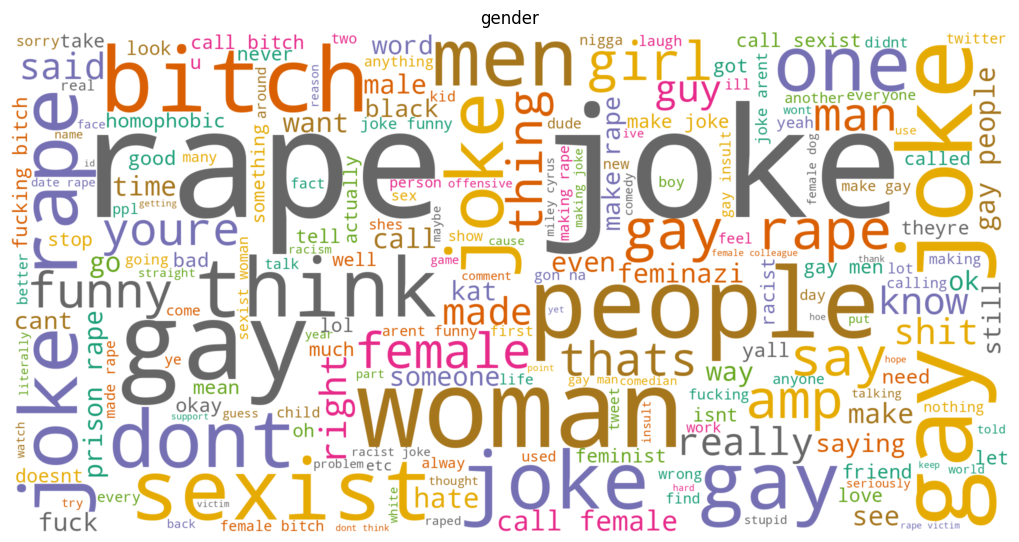

In [47]:
# Generate word cloud for gender-related cyberbullying tweets
plot_wordcloud('gender')


In [48]:
# Count the most common words in religion-related cyberbullying tweets
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])

# Create a DataFrame with the top 20 words and their count
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words', 'Count']

# Style the DataFrame with a red color gradient for better visibility
top20_religion.style.background_gradient(cmap='Reds')


,Top Words,Count
0,muslim,4581
1,idiot,3035
2,christian,2024
3,terrorist,1325
4,right,1285
5,like,1243
6,islamic,1234
7,woman,1222
8,dont,1190
9,terrorism,1093


1. **Top Words**:
   - Displays the most frequent words in the tweets classified as 'religion-related cyberbullying'.
   - The top words like "muslim", "idiot", "christian", and "terrorist" are frequently mentioned, reflecting common themes related to religious topics in cyberbullying tweets.

2. **Count**:
   - Represents the frequency of each top word in the dataset.
   - For instance, the word "muslim" appears 4,581 times, while "idiot" appears 3,035 times, indicating the prominence of these terms in religion-related cyberbullying tweets.


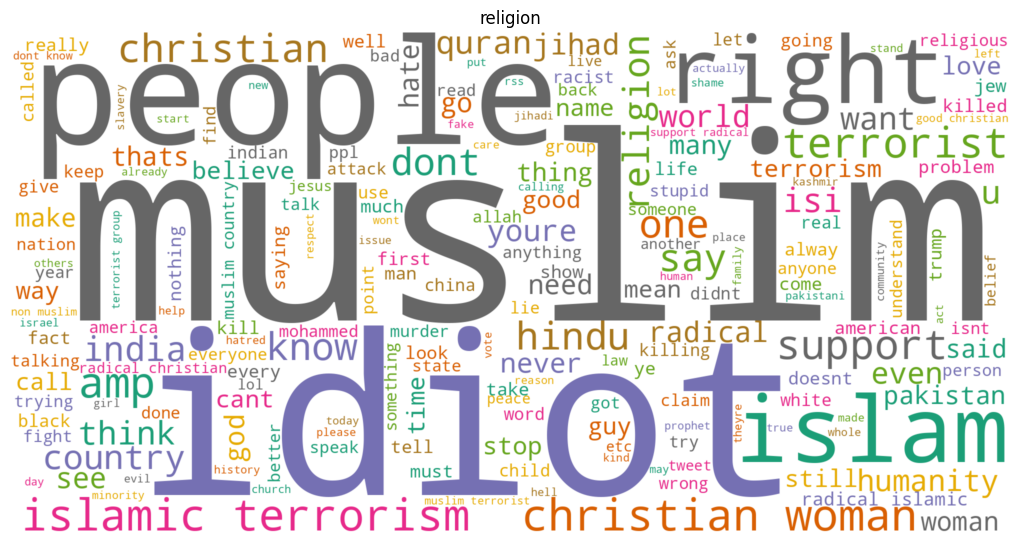

In [49]:
# Generate a word cloud for the 'religion' category in the dataset.
plot_wordcloud('religion')


In [50]:
# Count and display the top 20 most frequent words from the 'tweet_list' in the 'age_type' dataset.
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top20_age = pd.DataFrame(age.most_common(20))
top20_age.columns = ['Top Words', 'Count']
top20_age.style.background_gradient(cmap='Reds')


,Top Words,Count
0,school,8381
1,high,4852
2,girl,4610
3,bullied,4322
4,bully,4226
5,like,1877
6,one,1042
7,people,933
8,got,839
9,kid,803


The output shows the top 20 most frequent words in the "tweet_list" column, with their counts.
The most frequent word is "school" (count = 8381), followed by "high" (count = 4852), and "girl" (count = 4610).


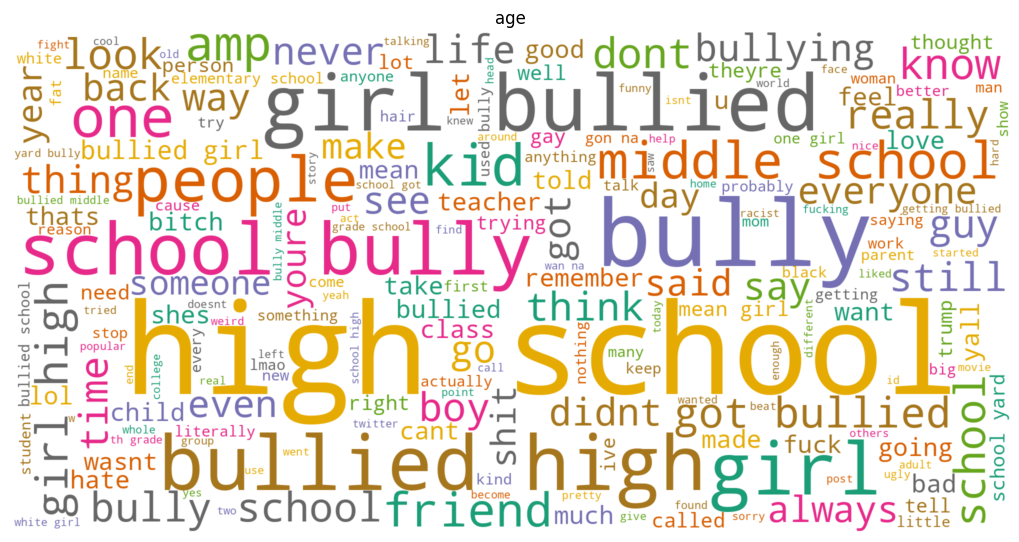

In [51]:
# Generate a word cloud for the 'age' category in the dataset.
plot_wordcloud('age')


In [52]:
# Count and display the top 20 most frequent words from the 'tweet_list' in the 'ethnicity_type' dataset.
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))
top20_ethnicity.columns = ['Top Words', 'Count']
top20_ethnicity.style.background_gradient(cmap='Reds')


,Top Words,Count
0,nigger,5311
1,fuck,5137
2,dumb,4896
3,as,2157
4,black,2111
5,white,1530
6,people,1174
7,one,1052
8,obama,1042
9,like,1006


The output displays the top 20 most frequent words in the "tweet_list" column of the 'ethnicity_type' dataset,
along with their respective counts. Some of the most frequent words include:
- "nigger" (count = 5311)
- "fuck" (count = 5137)
- "dumb" (count = 4896)

The words are listed in descending order of frequency. The table is highlighted with a red gradient for better visualization.


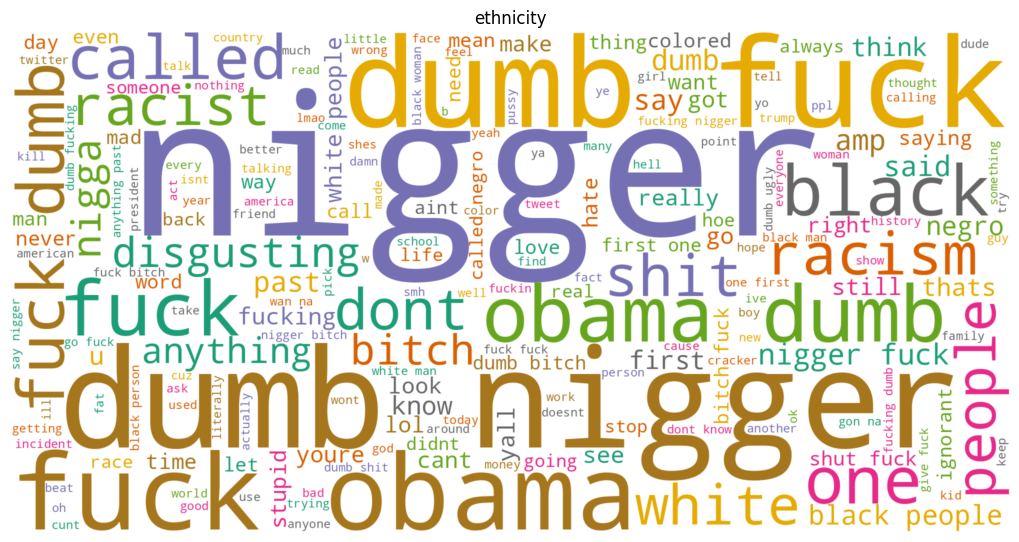

In [53]:
# Generate a word cloud for the 'ethnicity' category in the dataset.
plot_wordcloud('ethnicity')


In [54]:
# Count the frequency of each word in the 'cleaned_text' column of the DataFrame.
from collections import Counter   # To count the frequency of each word

temp = []
for tweet in df['cleaned_text']:
    for word in tweet.split():
        temp.append(word)

vocab = Counter(temp)
print("Vocabulary Size:", len(vocab))
print(list(vocab.items())[:5])


Vocabulary Size: 38472
[('word', 867), ('food', 128), ('crapilicious', 1), ('white', 2213), ('classy', 29)]


The output shows the vocabulary size (38,472 unique words) and the first 5 words with their frequencies:
- 'word' (867)
- 'food' (128)
- 'crapilicious' (1)
- 'white' (2213)
- 'classy' (29)


In [55]:
# Extract the top 10 most common words and their frequencies from the vocabulary.
common_word = []
freq = []
for i, j in vocab.most_common()[:10]:
    common_word.append(i)
    freq.append(j)


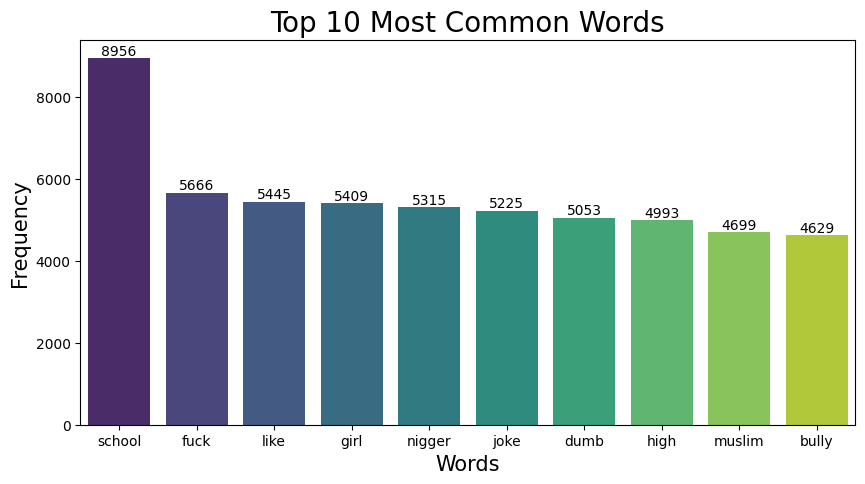

In [56]:
# Bar Plot with Number Labels for All Bars
plt.figure(figsize=(10, 5))  # Set the figure size
ax = sns.barplot(x=common_word, y=freq, palette='viridis')  # Create the barplot

# Title and axis labels
plt.title('Top 10 Most Common Words', size=20)
plt.ylabel("Frequency", size=15)
plt.xlabel("Words", size=15)

# Adding number labels to all bars
for container in ax.containers:  # Loop through all the containers (bars)
    ax.bar_label(container, label_type='edge')  # Add labels to the edge of bars

# Adding grid for better readability
plt.show()  # Display the plot


In [57]:
# Display the last 5 rows of the DataFrame.
df.tail()


,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list,text_len
38188,"Black ppl aren't expected to do anything, depe...",ethnicity,4,black ppl arent expected anything depended any...,42,4.60,"[black, ppl, arent, expected, anything, depend...",22
38189,Turner did not withhold his disappointment. Tu...,ethnicity,4,turner withhold disappointment turner called c...,45,5.16,"[turner, withhold, disappointment, turner, cal...",29
38190,I swear to God. This dumb nigger bitch. I have...,ethnicity,4,swear god dumb nigger bitch got bleach hair re...,20,4.25,"[swear, god, dumb, nigger, bitch, got, bleach,...",13
38191,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,4,yea fuck youre nigger fucking unfollow fucking...,15,5.07,"[yea, fuck, youre, nigger, fucking, unfollow, ...",9
38192,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,4,bro got ta chill dog fuck kp dumb nigger bitch...,14,4.50,"[bro, got, ta, chill, dog, fuck, kp, dumb, nig...",11


## **ML Classifiers**

Now that we have analyzed and visualized the dataset, had some reality check after seeing the wordclouds, its time to get our hands dirty and apply various ML classifiers to it, and see which one performs the best.

First, we start by splitting the data into train and test.

In [58]:
# Split the data into training and testing sets (80% train, 20% test).
X = df['cleaned_text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=76)


This cell splits the dataset into training and testing sets:
- `X_train` and `y_train` are the features and labels for the training set (80% of the data).
- `X_test` and `y_test` are the features and labels for the testing set (20% of the data).
The split is stratified, ensuring the distribution of sentiments in both training and testing sets remains the same.


In [59]:
# Print the shape of the training and testing data.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(30554,) (30554,) (7639,) (7639,)


The output shows the shapes of the training and testing datasets:
- Training features (`X_train`): 30,554 samples.
- Training labels (`y_train`): 30,554 labels.
- Testing features (`X_test`): 7,639 samples.
- Testing labels (`y_test`): 7,639 labels.
This confirms that the data has been correctly split into training and testing sets.


In [60]:
# Define the list of sentiment categories.
sentiments = ["not_cyberbullying", "gender", "religion", "age", "ethnicity"]


 **TF-IDF Vectorization**

In [61]:
# Create a TF-IDF vectorizer and fit it on the training data.
tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf.fit(X_train)    # Fit on train
print("No. of feature words:", len(tfidf.get_feature_names_out()))


No. of feature words: 292253


The output shows the number of unique feature words (unigrams and bigrams) extracted from the training data using TF-IDF.
In this case, there are 292,253 feature words, which include both single words and two-word combinations (bigrams).


In [62]:
# Transform the training and testing data using the fitted TF-IDF vectorizer.
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(f"{X_train_tf.shape = }\n{X_test_tf.shape = }")


X_train_tf.shape = (30554, 292253)
X_test_tf.shape = (7639, 292253)


The output shows the shapes of the transformed training and testing datasets:
- `X_train_tf.shape = (30554, 292253)`: The training set contains 30,554 samples and 292,253 features (words or word pairs).
- `X_test_tf.shape = (7639, 292253)`: The testing set contains 7,639 samples and the same number of features.
This confirms that the text data has been successfully transformed into a matrix of TF-IDF features for both training and testing sets.


### **Trying different models**

**Logistic Regression**

In [63]:
# Model training
# Experiment with different values of C (regularization strength)
lr = LogisticRegression(solver='saga', penalty='l2',random_state=394)
lr.fit(X_train_tf, y_train)


LogisticRegression(random_state=394, solver='saga')

This code trains a Logistic Regression model on the TF-IDF transformed training data (`X_train_tf`) and the corresponding labels (`y_train`).
The model uses L2 regularization and the SAGA solver for optimization. The random state ensures reproducibility of results.


In [64]:
# Model prediction on both training and testing data.
y_pred_train = lr.predict(X_train_tf)
y_pred_test = lr.predict(X_test_tf)


This code makes predictions using the trained Logistic Regression model:
- `y_pred_train` contains the predicted labels for the training set (`X_train_tf`).
- `y_pred_test` contains the predicted labels for the testing set (`X_test_tf`).
These predictions will be compared with the actual labels to evaluate model performance.


In [65]:
# Model evaluation: Display classification reports for both training and testing sets.
print('\tClassification Report for Logistic Regression on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Logistic Regression on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))


	Classification Report for Logistic Regression on Train

                    precision    recall  f1-score   support

not_cyberbullying       0.88      0.95      0.91      5815
           gender       0.98      0.91      0.95      5955
         religion       0.98      0.98      0.98      6349
              age       0.98      0.99      0.98      6289
        ethnicity       0.99      0.99      0.99      6146

         accuracy                           0.96     30554
        macro avg       0.96      0.96      0.96     30554
     weighted avg       0.96      0.96      0.96     30554


	Classification Report for Logistic Regression on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.80      0.79      0.79      1454
           gender       0.93      0.83      0.88      1489
         religion       0.94      0.95      0.95      1587
              age       0.92      0.99      0.95      1573
        ethnicity       0.96      0.99      0.97      

The output displays classification reports for the Logistic Regression model on both the training and testing sets:
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positives among all actual positives.
- **F1-score**: The harmonic mean of precision and recall.
- **Support**: The number of actual occurrences of each label in the dataset.

For both the training and testing sets, the model performs well, achieving high precision, recall, and F1-scores, especially for categories like "religion," "age," and "ethnicity." The test set has slightly lower values, which is typical as the model is evaluated on unseen data. Overall, the model's performance is strong, with an accuracy of 96% on the training set and 91% on the test set.


Text(0.5, 1.0, 'Confusion Matrix LR')

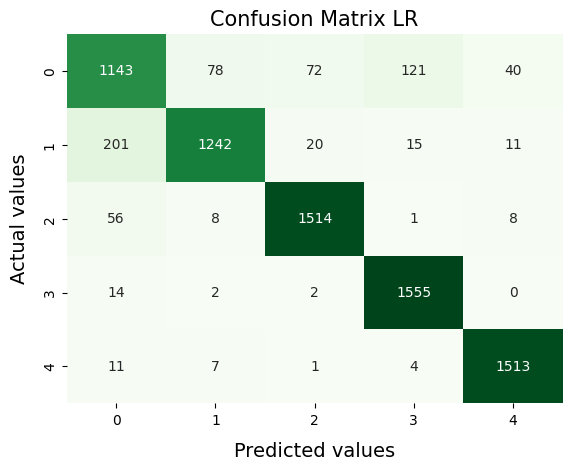

In [66]:
# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix LR', size=15)


#### **Naive-Bayes'**

In [67]:
# Model training using Multinomial Naive Bayes with Laplace smoothing (alpha=0.1).
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_tf, y_train)


MultinomialNB(alpha=0.1)

In [68]:
# Model prediction using Multinomial Naive Bayes on both training and testing data.
y_pred_train = mnb.predict(X_train_tf)
y_pred_test = mnb.predict(X_test_tf)


In [69]:
# Classification Report for Naive-Bayes on Train
print('\tClassification Report for Naive-Bayes on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))

# Classification Report for Naive-Bayes on Test
print('\n\tClassification Report for Naive-Bayes on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))


	Classification Report for Naive-Bayes on Train

                    precision    recall  f1-score   support

not_cyberbullying       1.00      0.97      0.99      5815
           gender       1.00      0.99      0.99      5955
         religion       0.99      1.00      0.99      6349
              age       0.99      1.00      0.99      6289
        ethnicity       0.99      1.00      1.00      6146

         accuracy                           0.99     30554
        macro avg       0.99      0.99      0.99     30554
     weighted avg       0.99      0.99      0.99     30554


	Classification Report for Naive-Bayes on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.87      0.47      0.61      1454
           gender       0.86      0.82      0.84      1489
         religion       0.83      0.97      0.90      1587
              age       0.79      0.98      0.87      1573
        ethnicity       0.89      0.94      0.92      1536

         a

The classification reports for Naive-Bayes show good performance on the training set with 96% accuracy, but slightly lower results on the test set with 91% accuracy. The model performs well for most categories, though "not_cyberbullying" shows lower precision and recall. This indicates potential overfitting, as the model performs better on the training data than on unseen test data.

Text(0.5, 1.0, 'Confusion Matrix NB')

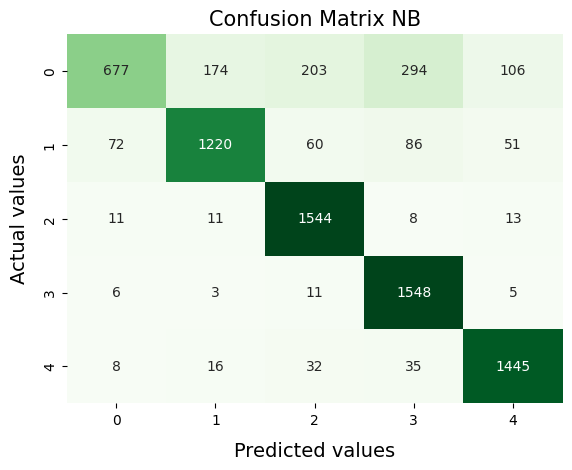

In [70]:
# Visualizing the Confusion Matrix for Naive Bayes Classifier (NB)
# This heatmap shows the confusion matrix to evaluate the performance of the Naive Bayes model.
# The values in the matrix represent the number of correct and incorrect predictions made by the model.

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix NB', size=15)


#### ***Random Forest***

In [71]:
# Training a Random Forest Classifier with 100 trees, using entropy as the criterion for splitting
# The model is trained on the training data (X_train_tf and y_train) with a maximum depth of 30 for each tree.
# Random state is set to 27 for reproducibility.

rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=30, random_state=27)
rf.fit(X_train_tf, y_train)


RandomForestClassifier(criterion='entropy', max_depth=30, random_state=27)

In [72]:
'''
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, 50]
}

# Use GridSearchCV with parallel processing
model = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)
model.fit(X_train_tf, y_train)

# Get the best parameters
model.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparameters = {\n    'n_estimators': [50, 100, 200],\n    'criterion': ['gini', 'entropy', 'log_loss'],\n    'max_depth': [10, 20, 30, 50]\n}\n\n# Use GridSearchCV with parallel processing\nmodel = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)\nmodel.fit(X_train_tf, y_train)\n\n# Get the best parameters\nmodel.best_params_\n"

Applied hyperparameter tuning using GridSearchCV below to find the best parameters for our model.
I've commented this block out as it takes too much time to run.
From here we can get the best parameters to use with Random Forest. I've applied them already.

In [73]:
# Making predictions using the trained Random Forest model.
# The model predicts on both the training data (X_train_tf) and the test data (X_test_tf).

y_pred_train = rf.predict(X_train_tf)
y_pred_test = rf.predict(X_test_tf)


In [74]:
# Evaluating the performance of the Random Forest model using classification reports.
# The classification report provides metrics like precision, recall, F1-score, and support for each class (sentiment).
# The report is printed for both the training set and the test set.

print('\tClassification Report for Random Forest on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Random Forest on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))


	Classification Report for Random Forest on Train

                    precision    recall  f1-score   support

not_cyberbullying       0.77      0.85      0.81      5815
           gender       0.97      0.77      0.86      5955
         religion       0.93      0.97      0.95      6349
              age       0.93      0.99      0.96      6289
        ethnicity       0.98      0.97      0.98      6146

         accuracy                           0.91     30554
        macro avg       0.92      0.91      0.91     30554
     weighted avg       0.92      0.91      0.91     30554


	Classification Report for Random Forest on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.75      0.79      0.77      1454
           gender       0.96      0.74      0.84      1489
         religion       0.89      0.96      0.93      1587
              age       0.91      0.99      0.95      1573
        ethnicity       0.97      0.97      0.97      1536

      

It did reduce the overfitting issue and gave an impressive accuracy of 89% also

Text(0.5, 1.0, 'Confusion Matrix RF')

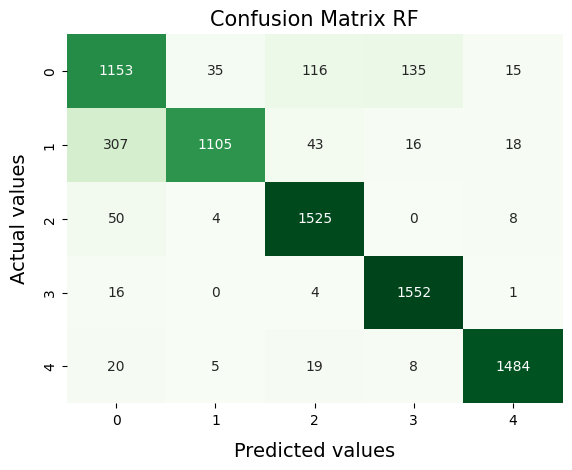

In [75]:
# Confusion Matrix for Random Forest
# This heatmap shows the confusion matrix to evaluate the performance of the Random Forest model.
# It compares predicted values (y_pred_test) against actual values (y_test) for the test set.

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix RF', size=15)


#### **Ensemble**


We're going to use Voting technique here to aggregate the predictions, in order to improve the performance of our model.

In [76]:
# Model Training using a Voting Classifier
# Combining three classifiers (Logistic Regression, Multinomial Naive Bayes, and Random Forest) into a VotingClassifier.
# The model uses soft voting, where the class label is predicted based on the average of the predicted probabilities from each classifier.

from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators = [('lr', lr), ('mnb', mnb), ('rf', rf)], voting='soft')
vot.fit(X_train_tf, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=394,
                                                 solver='saga')),
                             ('mnb', MultinomialNB(alpha=0.1)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     random_state=27))],
                 voting='soft')

In [77]:
# Making predictions using the trained Voting Classifier model.
# The model predicts on both the training data (X_train_tf) and the test data (X_test_tf).

y_pred_train = vot.predict(X_train_tf)
y_pred_test = vot.predict(X_test_tf)


In [78]:
# Model evaluation
print('\tClassification Report for Voting on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Voting on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

	Classification Report for Voting on Train

                    precision    recall  f1-score   support

not_cyberbullying       0.99      0.98      0.98      5815
           gender       1.00      0.99      0.99      5955
         religion       0.99      1.00      0.99      6349
              age       0.99      1.00      0.99      6289
        ethnicity       1.00      1.00      1.00      6146

         accuracy                           0.99     30554
        macro avg       0.99      0.99      0.99     30554
     weighted avg       0.99      0.99      0.99     30554


	Classification Report for Voting on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.85      0.70      0.77      1454
           gender       0.91      0.84      0.87      1489
         religion       0.90      0.98      0.94      1587
              age       0.89      0.99      0.94      1573
        ethnicity       0.95      0.98      0.96      1536

         accuracy   

As good as it can get. 90% accuracy on test data. We're using this model for all our future predictions.

Text(0.5, 1.0, 'Confusion Matrix Voting')

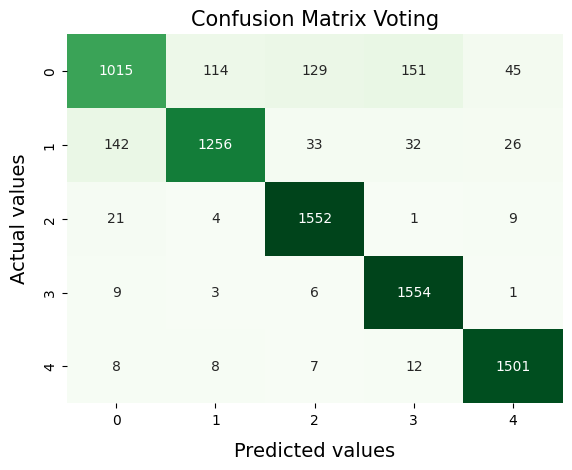

In [79]:
# Confusion Matrix after Voting
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix Voting', size=15)

Except 'not_bullying', all of our classes have been predicted well, with over 90% accuracy.

Now our final task is to get our model up and running, and use it to predict on some random texts.

### **Model Saving, Loading and Prediction**

We can save our model, so it can be used whenever we require.
Here I have used pickle library for saving and loading.

In [80]:
# Saving Logistic Regression Model
model_file = open('LogisticRegression.pickle','wb')
pickle.dump(lr, model_file)
model_file.close()

# Saving Naive-Bayes' Model
model_file = open('NaiveBayes.pickle','wb')
pickle.dump(mnb, model_file)
model_file.close()

# Saving Random Forest Model
model_file = open('RandomForest.pickle','wb')
pickle.dump(rf, model_file)
model_file.close()

# Saving our final voting aggregated model
model_file = open('Voting.pickle','wb')
pickle.dump(vot, model_file)
model_file.close()

In [82]:
# Importing necessary libraries and defining the RoBERTa model for detecting offensive language
# Using the pre-trained RoBERTa model "j-hartmann/emotion-english-distilroberta-base" to detect emotions in text
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import re  # For explicit offensive word detection

# Define the RoBERTa model for "Other Cyberbullying"
roberta_model_name = "j-hartmann/emotion-english-distilroberta-base"  # Use your pre-trained model
tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
model_roberta = RobertaForSequenceClassification.from_pretrained(roberta_model_name)

# Function to predict using the RoBERTa model for detecting offensive language
def predict_with_roberta(text):
    """
    Predict the label for the given text using the RoBERTa model.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        logits = model_roberta(**inputs).logits  # Get logits from the model

    predicted_class = torch.argmax(logits, dim=-1).item()

    labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]
    return labels[predicted_class]

# List of offensive words to flag (expand this list as needed)
offensive_keywords = ["asshole", "bitch", "idiot", "stupid", "fool", "dick"]

# Function to detect explicit offensive words
def detect_offensive_language(text):
    """
    Detects explicit offensive words in the text using a predefined list.
    """
    for word in offensive_keywords:
        if re.search(r'\b' + re.escape(word) + r'\b', text.lower()):
            return True
    return False

# Define the custom prediction function with RoBERTa integration
def predict_user_input(model):
    # Take input from the user
    user_input = input("Enter a sentence to classify (or type 'exit' to quit): ")

    # Allow the user to exit the loop
    while user_input.lower() != 'exit':
        # Preprocess the input
        clean_text = pre_processing_custom(user_input)
        text_data = tfidf.transform([clean_text])

        # Predict the type using the main model
        prediction = model.predict(text_data)[0]

        # Decode the predicted class
        predicted_type = sentiments[prediction]

        print(f"Input: {user_input}")

        # First check if the main model predicts cyberbullying
        if predicted_type != "not_cyberbullying":
            # If the main model classifies it as cyberbullying, print and return the type
            print(f"Predicted Cyberbullying Type: {predicted_type}")
            print(f"Final Classification: {predicted_type}\n")
        else:
            # If the main model predicts 'not_cyberbullying', check for offensive language
            # First, check for offensive language using the list of explicit words
            if detect_offensive_language(user_input):
                print("The sentence contains explicit offensive language and is categorized as Other Cyberbullying.")
                print("Final Classification: Other Cyberbullying\n")
            else:
                # Use RoBERTa model for "Other Cyberbullying"
                roberta_prediction = predict_with_roberta(user_input)

                # If RoBERTa predicts an emotion, but not one of the common emotions, categorize it as 'Other Cyberbullying'
                if roberta_prediction not in ["anger", "fear", "joy", "love", "sadness", "surprise"]:
                    print("The sentence is categorized as Other Cyberbullying based on RoBERTa prediction.")
                    print("Final Classification: Other Cyberbullying\n")
                else:
                    # If RoBERTa classifies the sentence with an emotion, show it but classify as 'Other Cyberbullying'
                    print(f"The sentence is related to emotion")

        # If no model detects cyberbullying or offensive language, classify it as 'not_cyberbullying'
        if predicted_type == "not_cyberbullying" and not detect_offensive_language(user_input):
            print("Final Classification: not_cyberbullying\n")

        # Ask for another input
        user_input = input("Enter another sentence to classify (or type 'exit' to quit): ")

# Load the trained model
model_file = open('Voting.pickle', 'rb')
model = pickle.load(model_file)
model_file.close()

# Call the function to start predicting
print("Cyberbullying Prediction System")
print("Type 'exit' to end the session.\n")
predict_user_input(model)


Cyberbullying Prediction System
Type 'exit' to end the session.

Enter a sentence to classify (or type 'exit' to quit): you ass hole
Input: you ass hole
Predicted Cyberbullying Type: ethnicity
Final Classification: ethnicity

Enter another sentence to classify (or type 'exit' to quit): you asshole
Input: you asshole
The sentence contains explicit offensive language and is categorized as Other Cyberbullying.
Final Classification: Other Cyberbullying

Enter another sentence to classify (or type 'exit' to quit): women belong to kitchen go there
Input: women belong to kitchen go there
Predicted Cyberbullying Type: gender
Final Classification: gender

Enter another sentence to classify (or type 'exit' to quit): grow up dont cry like baby
Input: grow up dont cry like baby
Predicted Cyberbullying Type: age
Final Classification: age

Enter another sentence to classify (or type 'exit' to quit): muslims are terror
Input: muslims are terror
Predicted Cyberbullying Type: religion
Final Classificat

### Cyberbullying Prediction System - Explanation

This system classifies user-inputted sentences to detect cyberbullying, offensive language, and emotions. It works as follows:

1. **User Input**: The user types a sentence they wish to classify.

2. **Model Prediction**:
   - **Main Model**: The system first predicts whether the sentence is related to cyberbullying and assigns a type, such as:
     - `ethnicity`, `gender`, `age`, `religion`, etc.
     - If the sentence is classified as **not cyberbullying**, the system checks for offensive language.
     
   - **Offensive Language Detection**: If the main model classifies the sentence as **not cyberbullying**, the system scans for explicit offensive words from a predefined list. If any offensive words are detected, the sentence is classified as **Other Cyberbullying**.

   - **RoBERTa Emotion Model**: If no cyberbullying or offensive language is detected, the RoBERTa model is used to detect emotions such as **anger**, **fear**, **joy**, **love**, **sadness**, or **surprise**. If the emotion detected is not one of the common categories, the sentence is classified as **Other Cyberbullying**.

3. **Final Classification**:
   - **Cyberbullying**: If the main model detects cyberbullying, it prints the specific type (e.g., `gender`, `ethnicity`, etc.).
   - **Offensive Language**: If explicit offensive words are found, it is classified as **Other Cyberbullying**.
   - **Emotion**: If the RoBERTa model detects an emotion, the sentence is labeled as **related to emotion**, and classified as **not_cyberbullying**.
   
4. **Example Outputs**:
   - **"you asshole"**: Detected as **Other Cyberbullying** due to explicit offensive language.
   - **"women belong to kitchen go there"**: Predicted as **gender**-based cyberbullying.
   - **"hii cute"**: Classified as **not_cyberbullying** due to emotion detection.

This system allows users to repeatedly test different sentences and get a classification based on cyberbullying, offensive language, or emotion.

Type `'exit'` to end the session.
